In [153]:
# Installing Packages I may need
import numpy as np 
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import sys
!{sys.executable} -m pip install mglearn
import mglearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.decomposition import PCA
import pandas as pd


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [180]:
# Explore Boston Dataset

from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))
print("Feature names:\n{}".format(boston.feature_names))

type(boston)



Data shape: (506, 13)
Feature names:
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


sklearn.utils.Bunch

In [157]:
# There are 13 measurements as input features - Crime rate, proximity to the Charles River, highway accessibility, and more
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [160]:
# Load derived dataset

X, y = mglearn.datasets.load_extended_boston()
print("X.shape:{}".format(X.shape))

# The resulting 104 features are derived from the 13 features with 91 possible combinations of two features within those (Muller, page 48)

X.shape:(506, 104)


In [161]:
# Split dataset and split into training and test set to build linear reg model

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Training set score:{:.2f}".format(lr.score(X_train, y_train)))
print("Test set score:{:.2f}".format(lr.score(X_test, y_test)))
# training set predicts accurately but the test set is not great - overfitting because there is a big difference between the two scores

Training set score:0.95
Test set score:0.61


In [162]:
# Use ridge regression to add further constraint for regularization

ridge = Ridge().fit(X_train, y_train)
print("Training set score:{:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score:{:.2f}".format(ridge.score(X_test, y_test)))

#Training set score with ridge is now lower and the test score higher. 
# Try increasing alpha to maybe help generalization

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score:{:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score:{:.2f}".format(ridge10.score(X_test, y_test)))

# Decrease alpha to see how less restricted coefficients affect the model
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score:{:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score:{:.2f}".format(ridge01.score(X_test, y_test)))
# Alpha = 0.1 looks like it works well, but there is such a big difference in the score values 
# which means there is probably overfitting.

Training set score:0.89
Test set score:0.75
Training set score:0.79
Test set score:0.64
Training set score:0.93
Test set score:0.77


In [163]:
# Try Lasso (L1 regularization - setting some coeffs = 0)

lasso = Lasso().fit(X_train, y_train)
print("Training set score:{:.2f}".format(lasso.score(X_train,y_train)))
print("Test set score:{:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:{}".format(np.sum(lasso.coef_ !=0)))

Training set score:0.29
Test set score:0.21
Number of features used:4


In [164]:
# Underfitting because values are close and overall bad score for Lasso, decrease alpha which should increase number of features used

lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(X_train, y_train)
print("Training set score:{:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score:{:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:{}".format(np.sum(lasso001.coef_ !=0)))

# Allowed to fit more complex model, performance a little better than Ridge, and keeping the features at 33, the model is simpler to understand
# Decrease alpha even more to see what happens

lasso00001 = Lasso(alpha = 0.0001, max_iter = 100000).fit(X_train, y_train)
print("Training set score:{:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score:{:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:{}".format(np.sum(lasso00001.coef_ !=0)))


Training set score:0.90
Test set score:0.77
Number of features used:33
Training set score:0.95
Test set score:0.64
Number of features used:94


In [165]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet().fit(X_train, y_train)
print("Training set score:{:.2f}".format(enet.score(X_train,y_train)))
print("Test set score:{:.2f}".format(enet.score(X_test, y_test)))


Training set score:0.33
Test set score:0.22


In [166]:
enet001= ElasticNet(alpha = 0.01, l1_ratio = 0.5, max_iter=10000, random_state=0).fit(X_train, y_train)
print("Training set score:{:.2f}".format(enet001.score(X_train, y_train)))
print("Test set score:{:.2f}".format(enet001.score(X_test, y_test)))

Training set score:0.86
Test set score:0.72


In [167]:
enet0001= ElasticNet(alpha = 0.001, l1_ratio = 0.5, max_iter=10000, random_state=0).fit(X_train, y_train)
print("Training set score:{:.2f}".format(enet0001.score(X_train, y_train)))
print("Test set score:{:.2f}".format(enet0001.score(X_test, y_test)))

Training set score:0.92
Test set score:0.78


In [168]:
enet00001= ElasticNet(alpha = 0.0001, l1_ratio = 0.5, max_iter=100000, random_state=0).fit(X_train, y_train)
print("Training set score:{:.2f}".format(enet00001.score(X_train, y_train)))
print("Test set score:{:.2f}".format(enet00001.score(X_test, y_test)))

Training set score:0.94
Test set score:0.73


In [169]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)
from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(),
    Ridge())

In [170]:
param_grid = {'polynomialfeatures__degree': [1,2,3],
             'ridge__alpha':[0.001, 0.01, 0.1, 1, 10, 100]}

In [171]:
grid = GridSearchCV(pipe, param_grid = param_grid, cv = 5, n_jobs = -1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'polynomialfeatures__degree': [1, 2, 3], 'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

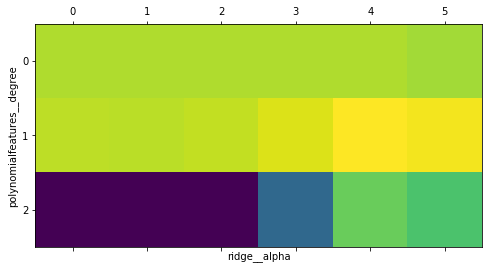

In [172]:
plt.matshow(grid.cv_results_['mean_test_score'].reshape(3, -1), vmin=0, cmap="viridis")
plt.xlabel("ridge__alpha")
plt.ylabel("polynomialfeatures__degree")
plt.show()

In [173]:
print("Best parameters:{}".format(grid.best_params_))

Best parameters:{'polynomialfeatures__degree': 2, 'ridge__alpha': 10}


In [174]:
print("Test-set score:{:.2f}".format(grid.score(X_test, y_test)))

Test-set score:0.77


In [175]:
# run gridsearch without polynomials

param_grid = {'ridge__alpha':[0.001, 0.01, 0.1, 1, 10, 100]}
pipe = make_pipeline(StandardScaler(), Ridge())
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Score without poly features:{:.2f}".format(grid.score(X_test, y_test)))

Score without poly features:0.63


In [176]:
# Score is better with polynomials

In [177]:
# Gridsearch on lasso
pipe = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(),
    Lasso())
param_grid = {'polynomialfeatures__degree': [1,2,3],
             'lasso__alpha':[0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid = param_grid, cv = 5, n_jobs = -1)
grid.fit(X_train, y_train)
print("Best parameters:{}".format(grid.best_params_))
print("Test-set score:{:.2f}".format(grid.score(X_test, y_test)))

Best parameters:{'lasso__alpha': 0.1, 'polynomialfeatures__degree': 2}
Test-set score:0.78


In [178]:
# Gridsearch on ElasticNet
pipe = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(),
    ElasticNet())
param_grid = {'polynomialfeatures__degree': [1,2,3],
             'elasticnet__alpha':[0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid = param_grid, cv = 5, n_jobs = -1)
grid.fit(X_train, y_train)
print("Best parameters:{}".format(grid.best_params_))
print("Test-set score:{:.2f}".format(grid.score(X_test, y_test)))

Best parameters:{'elasticnet__alpha': 0.1, 'polynomialfeatures__degree': 2}
Test-set score:0.79
